### Set up the env

In [2]:
# import the packages
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Get data ready

In [3]:
# import data from data folder
heart_disease = pd.read_csv('data/heart-disease.csv')

# check data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# split the data into data or X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [5]:
# split the data into train set and test set by sklearn
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# check the size of them
X_train.size, X_test.size

(3146, 793)

### Preparing a machine learning model

In [16]:
# import the modules
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
models = {"LinearSVC": LinearSVC(dual="auto", tol=1e-5),
          "KNN": KNeighborsClassifier(n_neighbors=2),
          "SVC": SVC(gamma='auto'),
          "LogisticRegression": LogisticRegression(solver='liblinear', max_iter=200),  # default is 100
          "RandomForestClassifier": RandomForestClassifier(n_estimators=100)}

### Fitting and evaluating models to get the best model

In [18]:
# Evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                          "precision": round(precision, 2),
                          "recall": round(recall, 2),
                          "f1": round(f1, 2)}
    
    return metric_dict

In [20]:
# fit and score all the modules
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    results[model_name] = evaluate_preds(y_test, y_preds)
    
# view the results
results

{'LinearSVC': {'accuracy': 0.87,
  'precision': 0.88,
  'recall': 0.88,
  'f1': 0.88},
 'KNN': {'accuracy': 0.64, 'precision': 0.73, 'recall': 0.5, 'f1': 0.59},
 'SVC': {'accuracy': 0.54, 'precision': 0.53, 'recall': 1.0, 'f1': 0.7},
 'LogisticRegression': {'accuracy': 0.87,
  'precision': 0.88,
  'recall': 0.88,
  'f1': 0.88},
 'RandomForestClassifier': {'accuracy': 0.85,
  'precision': 0.85,
  'recall': 0.88,
  'f1': 0.86}}

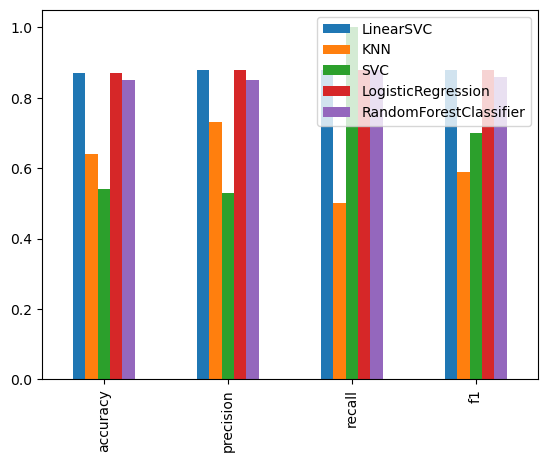

In [21]:
# check the results by plot
results_df = pd.DataFrame(data=[[results[clf][metric] for clf in results] for metric in ["accuracy", "precision", "recall", "f1"]],
                         index=["accuracy", "precision", "recall", "f1"],
                         columns=results.keys())
results_df.plot.bar();

### Hyperparameter Tuning

In [22]:
# Different LogisticRegression hyperparameters with RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_logreg_clf = RandomizedSearchCV(estimator=LogisticRegression(max_iter=200),
                                param_distributions=log_reg_grid,
                                cv=10,
                                n_iter=5,
                                verbose=2)

# Fit the instance of RandomizedSearchCV
rs_logreg_clf.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solv

RandomizedSearchCV(cv=10, estimator=LogisticRegression(max_iter=200), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [24]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_logreg_clf.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

### Evaluating

In [25]:
# Score the instance of RandomizedSearchCV using the test data
y_preds = rs_logreg_clf.predict(X_test)
evaluate_preds(y_preds, y_test)

{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.87, 'f1': 0.86}

In [27]:
# Create a classification report using the classification_report function
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [28]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score
cross_val_acc = np.mean(cross_val_score(rs_logreg_clf,
                                        X_test,
                                        y_test,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc  # 0.82 not bad

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solv

[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0048

[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END .........C=0.000263

0.8205128205128205

### Save the model

In [29]:
# import pickle
import pickle
pickle.dump(rs_logreg_clf, open( "rs_logreg_clf-20231111.pkl", "wb" ) )